In [525]:
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.patches as patches
import matplotlib.cm as cm

from matplotlib.gridspec import GridSpec
from mpl_toolkits.axes_grid1 import make_axes_locatable

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.geodesic import Geodesic
import xarray as xr


In [526]:
met = xr.open_dataset('lagrangian/data/20190103_surf.nc')

df_tracks = pd.read_csv("storm_tracks.csv", parse_dates=["time"])
df_lows = pd.read_csv("pressure_lows.csv", parse_dates=["time"])
df_basins = pd.read_csv("lows_basins.csv", parse_dates=["time"])
df_highs= pd.read_csv("pressure_highs.csv", parse_dates=["time"])
df_highs_basins = pd.read_csv("highs_basins.csv", parse_dates=["time"])

In [527]:
df_t = df_lows[df_lows["time"]==pd.Timestamp("2019-01-03 12:00:00")]
df_t = df_t[df_t["lat"] <= 80]

df_t_basins = df_basins[df_basins["time"]==pd.Timestamp("2019-01-03 12:00:00")]
df_t_basins = df_t_basins[df_t_basins["lat"] <= 80]

df_t_highs = df_highs[df_highs["time"]==pd.Timestamp("2019-01-03 12:00:00")]
df_t_highs = df_t_highs[df_t_highs["lat"] <= 80]

df_highs_basins = df_highs_basins[df_highs_basins["time"]==pd.Timestamp("2019-01-03 12:00:00")]
df_t_highs_basins = df_highs_basins[df_highs_basins["lat"] <= 80]

In [528]:
msl = met.sel(valid_time="2019-01-03T12:00:00")["msl"]/100

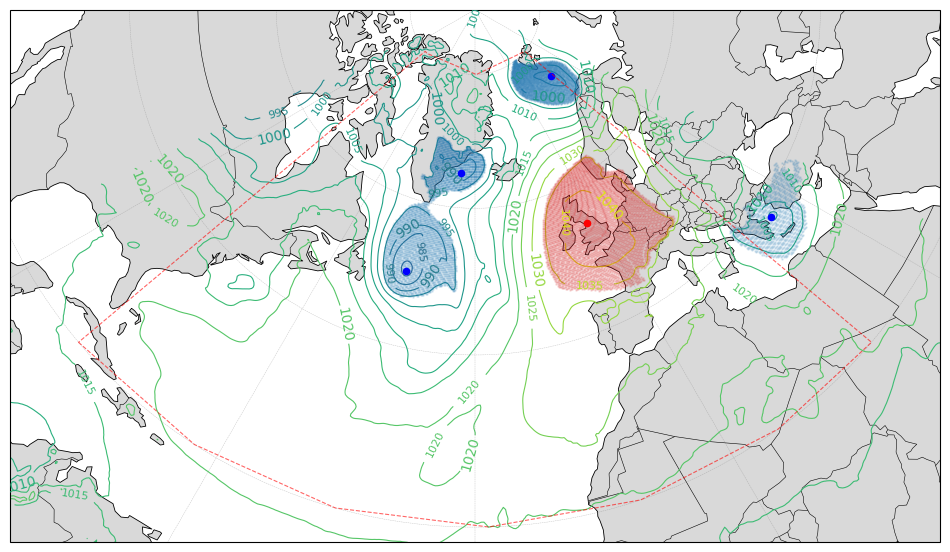

In [529]:
proj = ccrs.NorthPolarStereo(central_longitude=-30)
transform = ccrs.PlateCarree()

fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={"projection": proj}, dpi=100)

levels = np.arange(950, 1050, 5)

lon_plot = msl.longitude.values
lat_plot = msl.latitude.values
pressure = msl.values

cs = ax.contour(lon_plot, lat_plot, pressure, levels=levels, linewidths=0.8, transform=transform)

lows = ax.scatter(df_t["lon"], df_t["lat"], color='blue', s=20, transform=transform, label='Lows', zorder=10)
highs = ax.scatter(df_t_highs["lon"], df_t_highs["lat"], color="red", s=20, transform=transform, label='Highs', zorder=10)

ax.clabel(cs, fmt="%d", fontsize=8)

ax.add_feature(cfeature.LAND, facecolor="0.85", zorder=0)
ax.add_feature(cfeature.COASTLINE, linewidth=0.6)
ax.add_feature(cfeature.BORDERS, linewidth=0.4)

gl = ax.gridlines(draw_labels=False, linewidth=0.3, color="gray", alpha=0.5, linestyle="--")
gl.top_labels = False   
gl.right_labels = False


for low_id, group in df_t_basins.groupby("low_id"):

    ax.scatter(
        group["lon"],
        group["lat"],
        s=0.7,
        alpha=0.15,
        transform=ccrs.PlateCarree(),
        zorder=3,
        color='tab:blue'
    )

for high_id, group in df_t_highs_basins.groupby("low_id"):

    ax.scatter(
        group["lon"],
        group["lat"],
        s=0.7,
        alpha=0.15,
        transform=ccrs.PlateCarree(),
        zorder=3,
        color='tab:red'
    )

lon_min, lon_max = -80, 20
lat_min, lat_max = 20, 80

lons = [lon_min, lon_max, lon_max, lon_min, lon_min]
lats = [lat_min, lat_min, lat_max, lat_max, lat_min]

ax.plot(lons, lats,
        color='red',
        linewidth=0.8,
        alpha=0.6,
        transform=transform,
        zorder=20,
        linestyle="dashed")

ax.set_extent([-90, 30, 18, 90], crs=ccrs.PlateCarree())

levels = np.arange(950, 1050, 5)
label_levels = np.arange(950, 1050, 10)
ax.clabel(cs, levels=label_levels, fmt="%d")


plt.show()